In [1]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error #MSE and RMSE 
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score #r_square
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Surin\\Downloads\\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv")
df

,Unnamed: 0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,11,26,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,4
1,1,36,0,7,3,1,118,13,18,50,...,1,1,1,1,0,0,98,178,31,0
2,2,3,23,7,4,1,179,51,18,38,...,0,1,0,1,0,0,89,170,31,2
3,3,7,7,7,5,1,279,5,14,39,...,0,1,2,1,1,0,68,168,24,4
4,4,11,23,7,5,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,11,14,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,8
736,736,1,11,7,3,1,235,11,14,37,...,0,3,1,0,0,1,88,172,29,4
737,737,4,0,0,3,1,118,14,13,40,...,0,1,1,1,0,8,98,170,34,0
738,738,8,0,0,4,2,231,35,14,39,...,0,1,2,1,0,2,100,170,35,0


In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
conti = ["Month of absence", "Transportation expense","Son","Hit target","Distance from Residence to Work","Pet", "Service time", "Age", "Work load Average/day ", "Weight", "Height","Body mass index","Absenteeism time in hours"]

Month of absence  has values:
 [ 7  8  9 10 11 12  1  2  3  4  5  6  0]


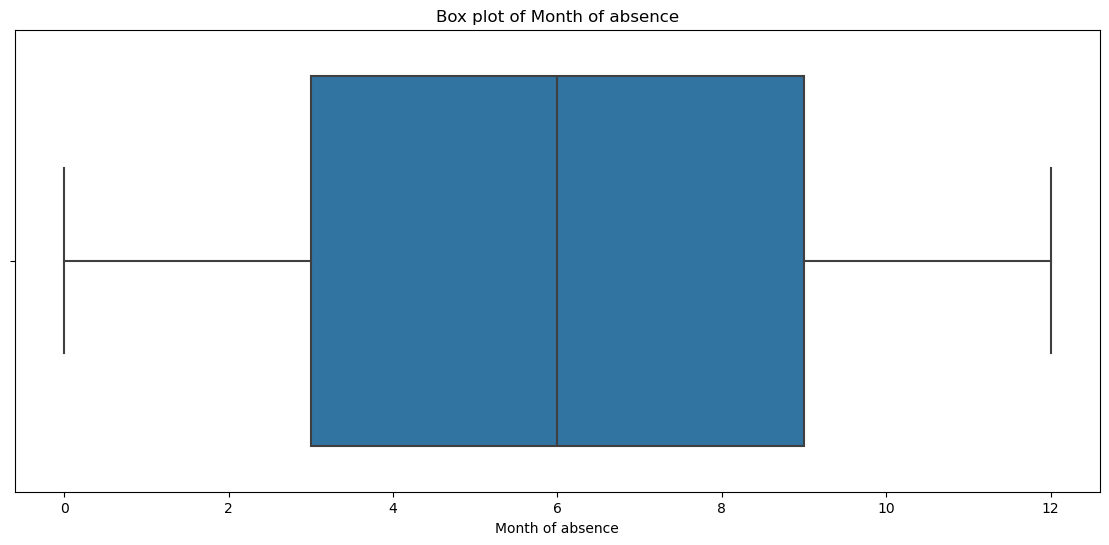

In [5]:
def treat_outlier(df, conti):
    q1 = df[conti].quantile(0.25)
    q3 = df[conti].quantile(0.75)
    
    iqr = q3 - q1
    
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    median_value = df[conti].median()
    
    df.loc[df[conti] < lower_fence, conti] = median_value
    df.loc[df[conti] > upper_fence, conti] = median_value
    
    return df
 
def analyze_numerical_columns(df, conti):
    for column in conti:

        # Treat outliers
        df = treat_outlier(df, column)
        print(column, " has values:\n", df[column].unique())
        
        plt.figure(figsize=(14, 6))
        
        # Boxplot 
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        
        plt.show()
conti = ["Month of absence"]


analyze_numerical_columns(df, conti)

In [6]:
# Why is the ID column is having repeated values
# It happens because employees can have multiple absenteeism entries over time, recorded under the same ID 

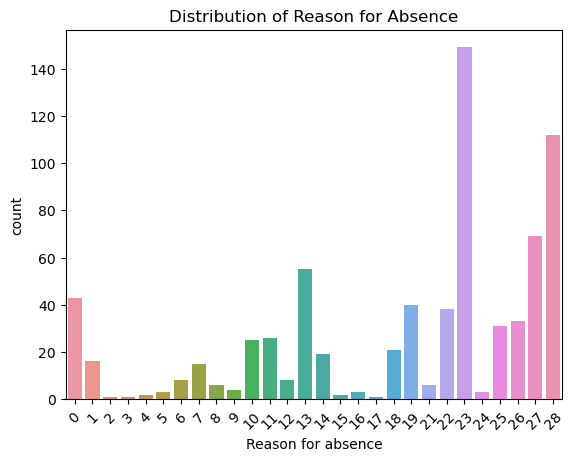

In [7]:
#1 What is the overall distribution of the Reason for absence?
sns.countplot(x="Reason for absence", data=df)
plt.title("Distribution of Reason for Absence")
plt.xticks(rotation=45)
plt.show()

In [8]:
#Analysis : Many employees were absent due to reason number 23 i.e. medical consultation followed by 28 i.e. dental consultation

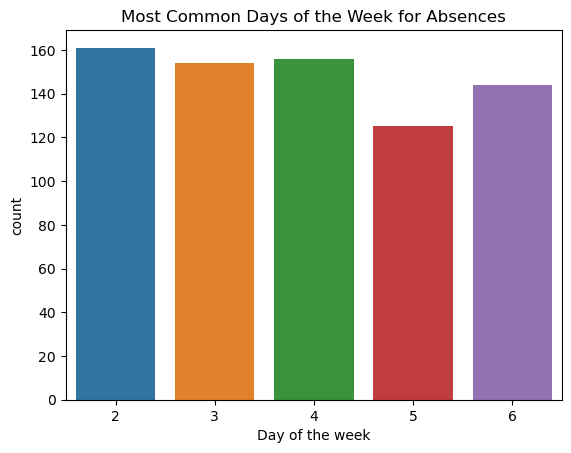

In [9]:
#2 What are the most common days of the week for absences?
sns.countplot(x="Day of the week", data=df)
plt.title("Most Common Days of the Week for Absences")
plt.show()

In [10]:
#Analysis: There are 3 days which are almost equal where the number of employees took off are same i.e. 2,3,4 - Monday,Tuesday&Wednesday

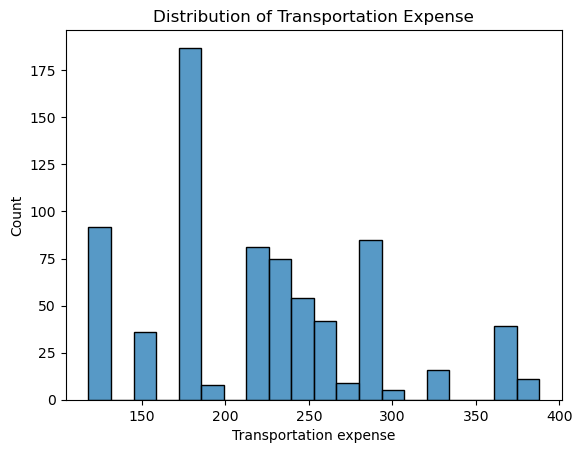

In [11]:
#3 What is the distribution of Transportation expense across employees?
sns.histplot(df["Transportation expense"], bins=20)
plt.title("Distribution of Transportation Expense")
plt.show()

In [12]:
#Analysis: There are a huge number of employees who spends between 150-200 to come to office everyday. 

In [13]:
#4 What is the average and median Distance from Residence to Work?
avg_distance = df["Distance from Residence to Work"].mean()
median_distance = df["Distance from Residence to Work"].median()

print("Average Distance:" ,avg_distance )
print("Median Distance:" ,median_distance)

Average Distance: 29.63108108108108
Median Distance: 26.0


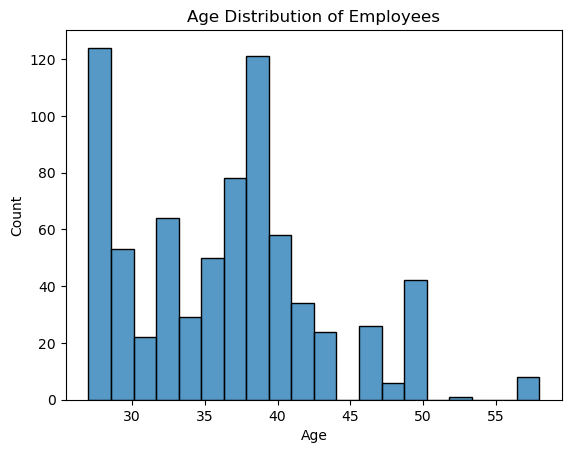

In [14]:
#5 What is the age distribution of the employees?
sns.histplot(df["Age"], bins=20)
plt.title("Age Distribution of Employees")
plt.show()

In [15]:
#Analysis: The graph shows that the company has maximum number of young employees

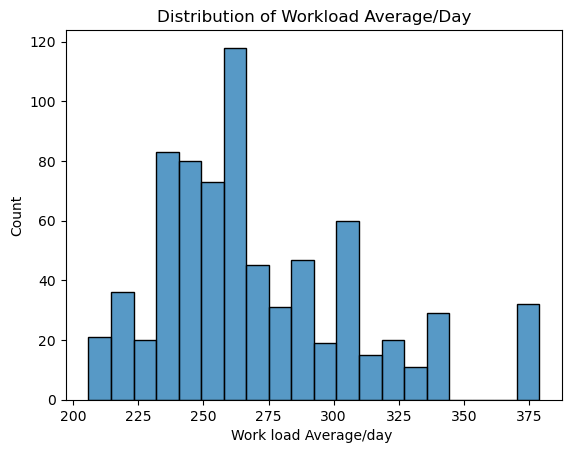

In [16]:
#6 What is the distribution of Work load Average/day?
sns.histplot(df["Work load Average/day "], bins=20)
plt.title("Distribution of Workload Average/Day")
plt.show()

In [17]:
#Analysis: There are around 120 number of employees whoes work load is maximum as compared to other employees in the company

In [18]:
#7 What percentage of employees hit their targets?
hit_target_percentage = df["Hit target"].mean() * 100
print("Percentage of employees who hit their targets:{} %".format(hit_target_percentage))

Percentage of employees who hit their targets:9458.783783783783 %


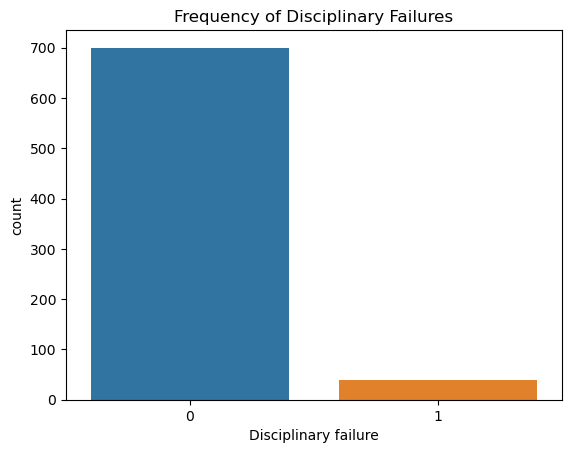

In [19]:
#8 How frequent are Disciplinary failures?
sns.countplot(x="Disciplinary failure", data=df)
plt.title("Frequency of Disciplinary Failures")
plt.show()

In [20]:
#Analysis: There are almost all emoloyees who have not done any disciplinary failure

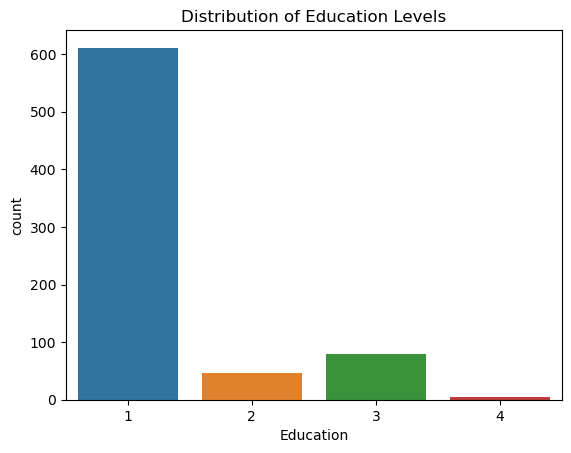

In [21]:
#9 What is the distribution of Education levels among employees?
sns.countplot(x="Education", data=df)
plt.title("Distribution of Education Levels")
plt.show()

In [22]:
#Analysis: Maximum number of employees have done till higher education followed by postgraduate and graduate

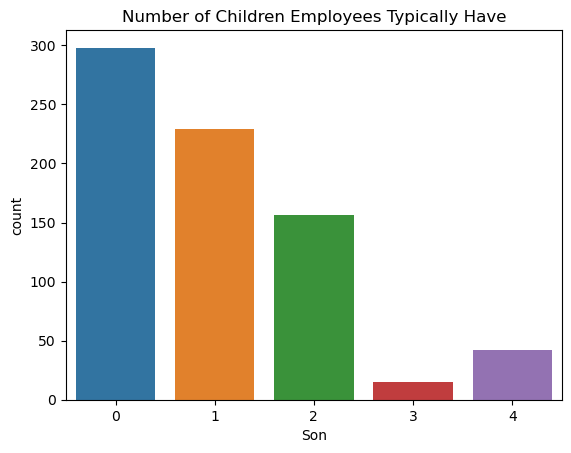

In [23]:
#10 How many children do employees typically have?
sns.countplot(x="Son", data=df)
plt.title("Number of Children Employees Typically Have")
plt.show()

In [24]:
#Analysis: Maximum number of employees have 0 number of son(s) followed by 1&2 son(s)

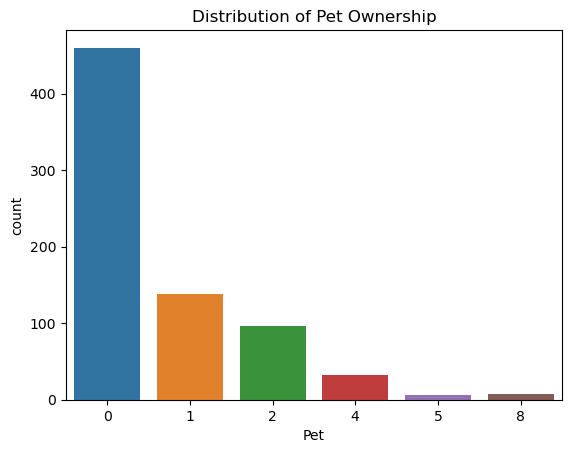

In [25]:
#11 What is the distribution of Pet ownership?
sns.countplot(x="Pet", data=df)
plt.title("Distribution of Pet Ownership")
plt.show()

In [26]:
#Analysis: Maximum number of employees has 0 pets followed by 1 and 2

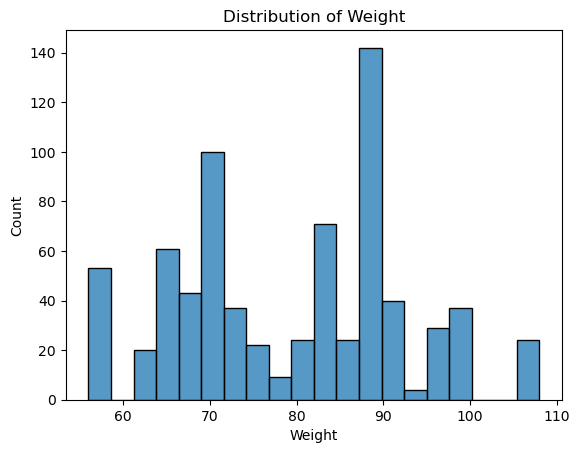

In [27]:
#12 What is the distribution of Weight among employees?
sns.histplot(df["Weight"], bins=20)
plt.title("Distribution of Weight")
plt.show()

In [28]:
#Analysis: There are higher number of employees whoes weight are around 90kgs followed by 70kgs

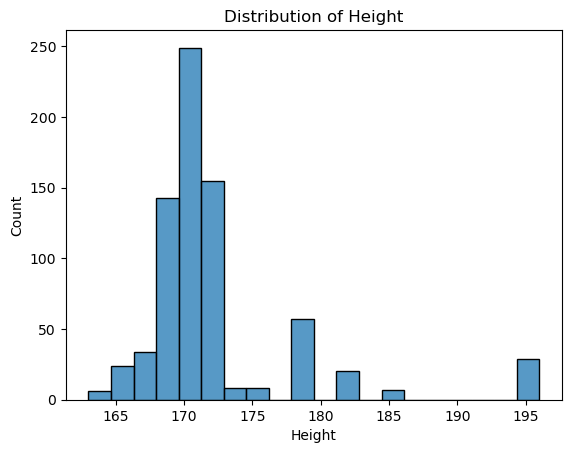

In [29]:
#13 What is the distribution of Height among employees?
sns.histplot(df["Height"], bins=20)
plt.title("Distribution of Height")
plt.show()

In [30]:
#Analysis: Maximum number of employees have height of 170cm

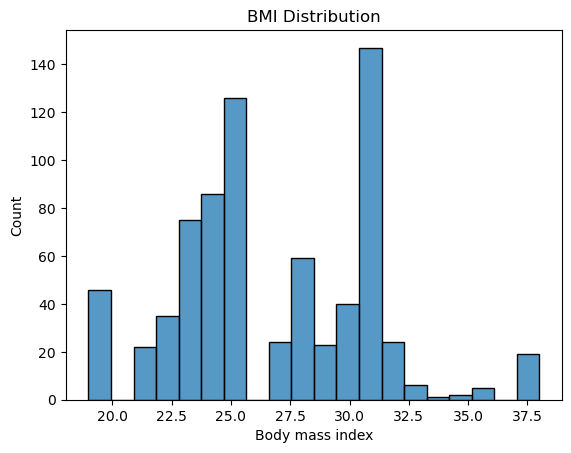

In [31]:
#14 What is the Body mass index distribution?
sns.histplot(df["Body mass index"], bins=20)
plt.title("BMI Distribution")
plt.show()

In [32]:
#Analysis: The number of employees whoes BMI is between 30-32.5 are high

In [33]:
#15 Is there a correlation between Age and Absenteeism time in hours?
correlation_age_absenteeism = df[["Age", "Absenteeism time in hours"]].corr()
print(correlation_age_absenteeism)

                               Age  Absenteeism time in hours
Age                        1.00000                    0.06576
Absenteeism time in hours  0.06576                    1.00000


In [34]:
#16 Is there a relationship between Distance from Residence to Work and Absenteeism time in hours?
correlation_distance_absenteeism = df[["Distance from Residence to Work", "Absenteeism time in hours"]].corr()
print(correlation_distance_absenteeism)

                                 Distance from Residence to Work  \
Distance from Residence to Work                         1.000000   
Absenteeism time in hours                              -0.088363   

                                 Absenteeism time in hours  
Distance from Residence to Work                  -0.088363  
Absenteeism time in hours                         1.000000  


In [35]:
#17 Is there a correlation between Body mass index and Absenteeism time in hours?
correlation_bmi_absenteeism = df[["Body mass index", "Absenteeism time in hours"]].corr()
print(correlation_bmi_absenteeism)

                           Body mass index  Absenteeism time in hours
Body mass index                   1.000000                  -0.049719
Absenteeism time in hours        -0.049719                   1.000000


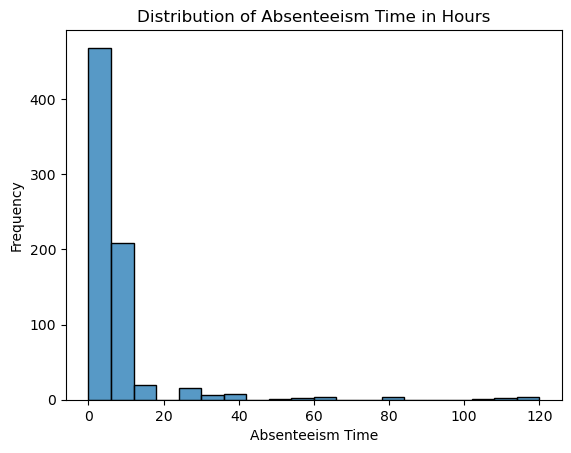

In [36]:
#18 What is the overall distribution of Absenteeism time in hours?
sns.histplot(df["Absenteeism time in hours"], bins=20)
plt.title("Distribution of Absenteeism Time in Hours")
plt.xlabel("Absenteeism Time")
plt.ylabel("Frequency")
plt.show()

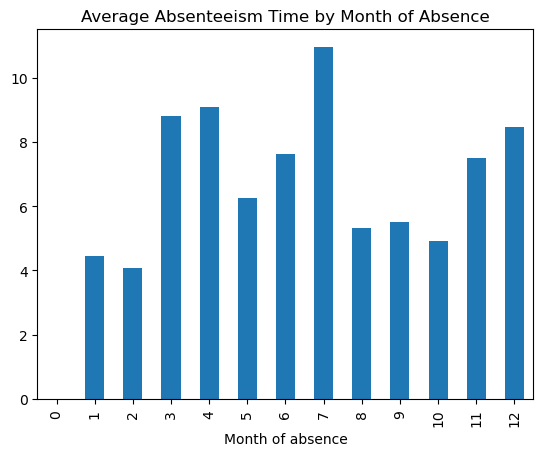

In [37]:
#19 What is the average Absenteeism time in hours by Month of absence?
avg_absenteeism_by_month = df.groupby("Month of absence")["Absenteeism time in hours"].mean()
avg_absenteeism_by_month.plot(kind="bar")
plt.title("Average Absenteeism Time by Month of Absence")
plt.show()

In [38]:
#Analysis: July is the month where the average absenteeism time was high as compared to other months

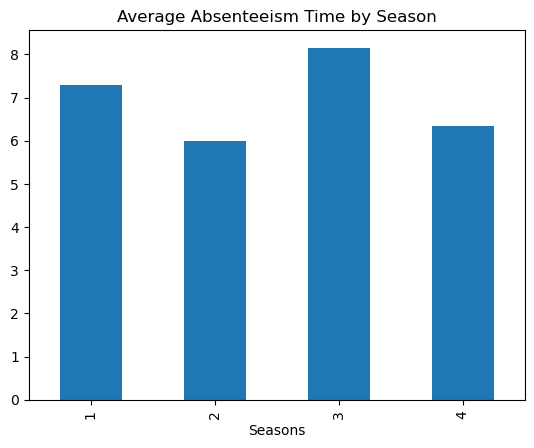

In [39]:
#20 What is the average Absenteeism time in hours by Season?
avg_absenteeism_by_season = df.groupby("Seasons")["Absenteeism time in hours"].mean()
avg_absenteeism_by_season.plot(kind="bar")
plt.title("Average Absenteeism Time by Season")
plt.show()

In [40]:
#Analysis: Winter was the season where the average absenteeism time was seen higher followed by summer

In [41]:
# Most Frequent Reasons for Absence

In [42]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [43]:
reason_counts = df['Reason for absence'].value_counts()
print("Most Frequent Reasons for Absence:")
print(reason_counts.head(10))  # Top 10 reasons

Most Frequent Reasons for Absence:
Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
Name: count, dtype: int64


In [44]:
#Interpretation : The reason number 22 is the most frequent reason for absence i.e. patient follow-up followed by reason number 27 i.e. physiotherapy

In [45]:
# Connection Between Absenteeism and Disciplinary Issues

In [46]:
disciplinary_absenteeism = df.groupby('Disciplinary failure')['Absenteeism time in hours'].mean()
print("Absenteeism and Disciplinary Issues:")
print(disciplinary_absenteeism)

Absenteeism and Disciplinary Issues:
Disciplinary failure
0    7.32
1    0.00
Name: Absenteeism time in hours, dtype: float64


In [47]:
#Interpretation: : Employees without disciplinary failures (value 0) have an average absenteeism time of 4.57 hours.This indicates that employees who have not faced disciplinary actions tend to have a higher level of absenteeism.
#The analysis suggests that employees who have been involved in disciplinary issues are less likely to be absent from work compared to those who have not. It can be because of strict monitoring of the employees performance etc.

In [48]:
#Impact of Health-Related Factors (BMI,Age) on Absenteeism

In [49]:
health_related_absenteeism = df[['Body mass index', 'Age', 'Absenteeism time in hours']].corr()
print("Correlation Between Health-Related Factors and Absenteeism:")
print(health_related_absenteeism)

Correlation Between Health-Related Factors and Absenteeism:
                           Body mass index       Age  \
Body mass index                   1.000000  0.470688   
Age                               0.470688  1.000000   
Absenteeism time in hours        -0.049719  0.065760   

                           Absenteeism time in hours  
Body mass index                            -0.049719  
Age                                         0.065760  
Absenteeism time in hours                   1.000000  


In [50]:
#Interpretation 
# There is a weak negative correlation between body mass index and absenteeism time. This suggests that individuals with higher BMIs might be slightly less likely to be absent from work. However, this relationship is not very strong, and other factors could also influence absenteeism rates.

In [51]:
# Workload, Transportation, and Work-Life Balance Impact

In [52]:
workload_transport_absenteeism = df[['Transportation expense', 'Distance from Residence to Work', 'Absenteeism time in hours']].corr()

print("Correlation Between Workload/Transportation and Absenteeism:")
print(workload_transport_absenteeism)

Correlation Between Workload/Transportation and Absenteeism:
                                 Transportation expense  \
Transportation expense                         1.000000   
Distance from Residence to Work                0.262183   
Absenteeism time in hours                      0.027585   

                                 Distance from Residence to Work  \
Transportation expense                                  0.262183   
Distance from Residence to Work                         1.000000   
Absenteeism time in hours                              -0.088363   

                                 Absenteeism time in hours  
Transportation expense                            0.027585  
Distance from Residence to Work                  -0.088363  
Absenteeism time in hours                         1.000000  


In [53]:
#Interpretation
# there is a weak positive correlation between both transportation expense and distance from residence to work, and absenteeism time. This suggests that employees facing higher transportation costs or longer commute times might be more likely to be absent from work.

In [54]:
#Task 1
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [55]:
df.isnull().sum()
# Since there are no missing values so missing value treatment is not required

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [56]:
df.shape

(740, 21)

In [57]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [58]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [59]:
# check all values to see if there is any meaningless data like # or other characters
for a in df.columns:   # very imp
    print(a,"contains \n:",df[a].value_counts())

ID contains 
: ID
3     97
28    74
34    50
20    42
22    41
11    40
15    36
36    34
14    29
24    28
33    24
1     23
10    23
17    20
5     18
18    16
13    15
25    10
9      8
6      8
23     8
12     7
30     7
27     6
2      6
7      6
26     5
32     5
29     5
19     3
21     3
31     3
8      2
16     2
4      1
35     1
Name: count, dtype: int64
Reason for absence contains 
: Reason for absence
23    142
28    108
13     55
27     47
0      43
19     40
22     37
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64
Month of absence contains 
: Month of absence
3     83
10    69
7     65
11    62
2     62
5     61
8     54
6     54
9     52
4     50
12    46
1     45
0      3
Name: count, dtype: int64
Day of the week contains 
: Day of the week
2    158
3    150
4    144
6    135
5    11

In [60]:
conti = [["Month of absence", "Transportation expense","Son","Hit target","Distance from Residence to Work","Pet", "Service time", "Age", "Work load Average/day ", "Weight", "Height","Body mass index","Absenteeism time in hours"]]

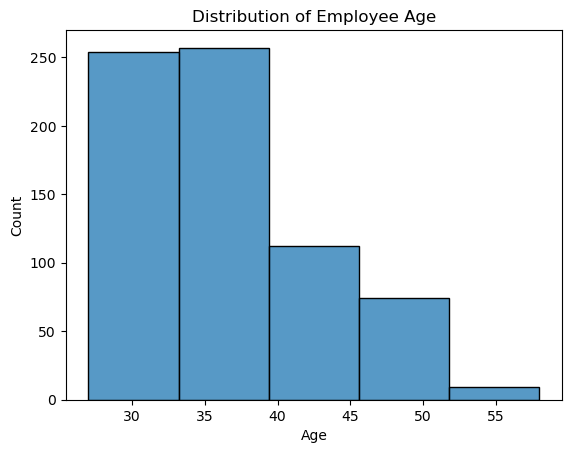

In [61]:
#Task 2
sns.histplot(df["Age"], bins=5)
plt.title("Distribution of Employee Age")
plt.show()

In [62]:
#Analysis : In the above histogram the maximum number of employees are 40 years old followed by 30years

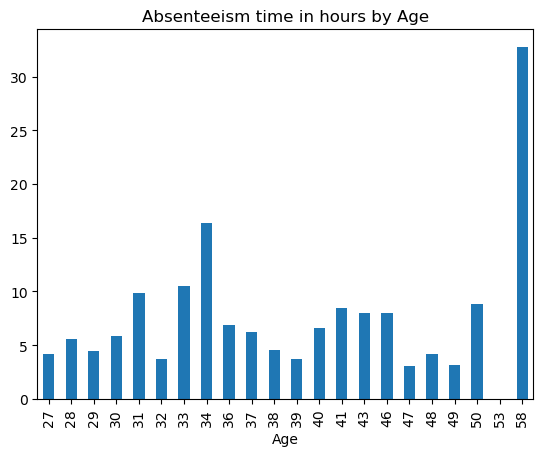

In [63]:
absenteeism_by_age = df.groupby("Age")["Absenteeism time in hours"].mean()
absenteeism_by_age.plot(kind="bar")
plt.title("Absenteeism time in hours by Age")
plt.show()

In [64]:
#Analysis: There are few employees of age 33,46,54 years who were absent for 8 hours 

In [65]:
# Before taking disciplinary action, it's important to investigate the reasons for absenteeism and consider the individual circumstances of each employee. 

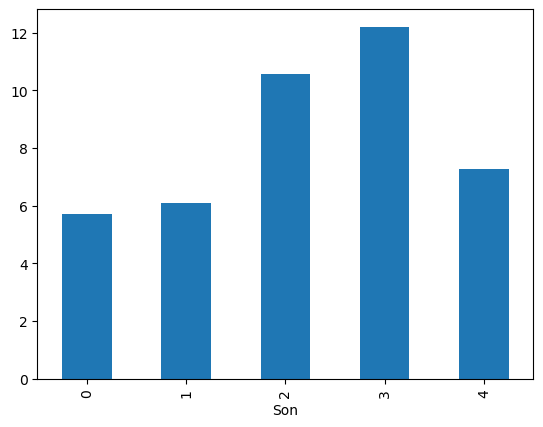

In [66]:
absenteeism_by_son = df.groupby("Son")["Absenteeism time in hours"].mean()
absenteeism_by_son.plot(kind="bar")
plt.show()

In [67]:
#Analysis: From the above chart, The employees who were absent for the maximum hours are having 3 children

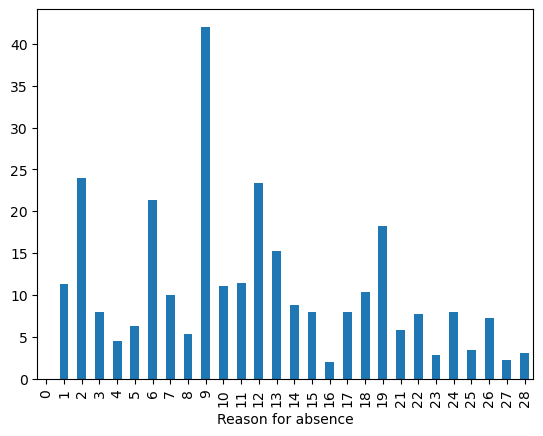

In [68]:
absenteeism_by_reason = df.groupby("Reason for absence")["Absenteeism time in hours"].mean()
absenteeism_by_reason.plot(kind="bar")
plt.show()

In [69]:
#Analysis: From the above bar chart, Maximum number of employees were absent because of Neoplasms followed by Diseases of the circulatory system 

In [70]:
#What are the reasons telling us about the people?
#There are huge number of employees who are taking leave because of neoplasms and the least number of employees who are taking off are because of Certain conditions originating in the perinatal period

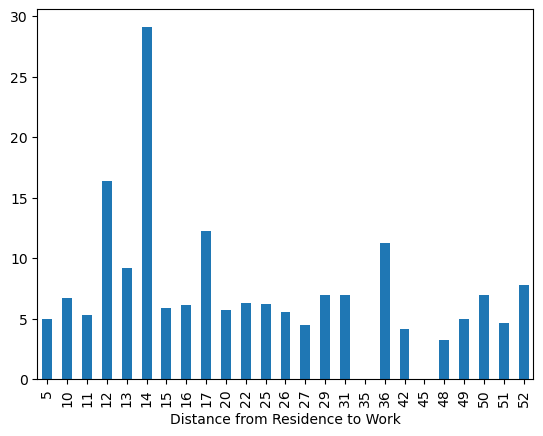

In [71]:
absenteeism_by_distance = df.groupby("Distance from Residence to Work")["Absenteeism time in hours"].mean()
absenteeism_by_distance.plot(kind="bar")
plt.show()

In [72]:
#Analysis: This graph shows that, The employees who were absent for the maxium time are living 36kms away from there work place followed by 12kms of distance

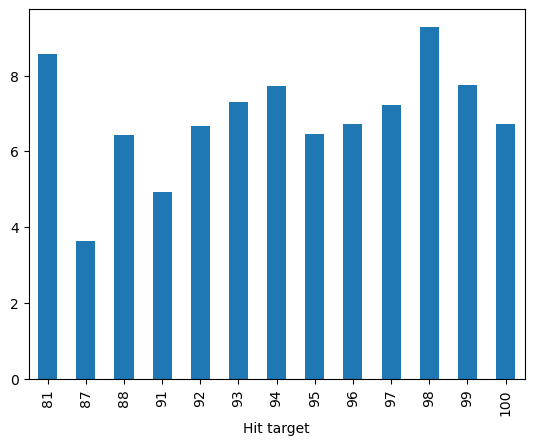

In [73]:
absenteeism_by_hittarget = df.groupby("Hit target")["Absenteeism time in hours"].mean()
absenteeism_by_hittarget.plot(kind="bar")
plt.show()

In [74]:
#Analysis: The employees who were absent for maximum number of hours i.e. 8 are serving since 24 years in the company followed by 16 years of service

In [75]:
#Employees who have hit their target i.e. 100 within the given time should be rewarded by the management for their hard work and the dedication to hit the target

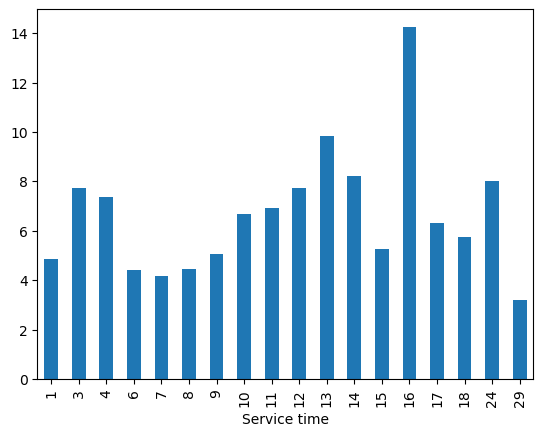

In [76]:
absenteeism_by_servicetime= df.groupby("Service time")["Absenteeism time in hours"].mean()
absenteeism_by_servicetime.plot(kind="bar")
plt.show()

In [77]:
#Analysis: The above bar chart shows that, the employees who were close to hit the target was absent the most

In [78]:
#Task 3

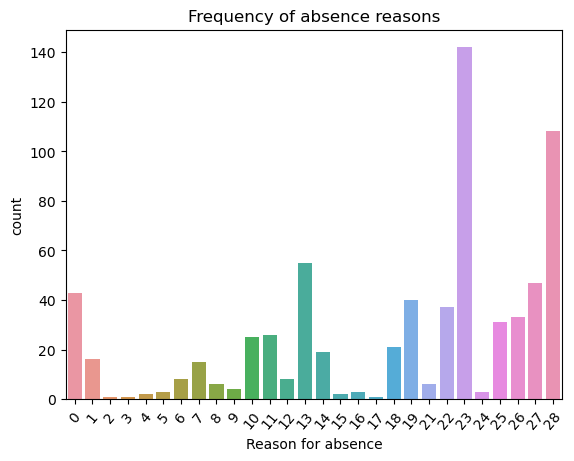

In [79]:
sns.countplot(x="Reason for absence", data=df)
plt.xticks(rotation = 50)
plt.title("Frequency of absence reasons")
plt.xlabel("Reason for absence")
plt.ylabel("count")
plt.show()

In [80]:
#Analysis: From the abover plot we can see that maximum number of employees were absent because of reason number 23 i.e. Medical Consultation followed by Dental Consultation and physiotherapy
# Maximum number of employees are taking off to get check themselves 

In [81]:
#LabelEncoder() will be used for Reason for absence, Day of the week,Seasons,Education   
#Disciplinary failure,Social drinker ,Social smoker will be converted into bool
#Transportation expense will be converted to float
#All the conti columns will be scalled

In [82]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [83]:
categ = ['Reason for absence', 'Day of the week', 'Seasons', 'Education']
for c in categ:
    df[c] = df[c].astype("category")

In [84]:
df["Transportation expense"] = df["Transportation expense"].astype("float")

In [85]:
df['Disciplinary failure'] = df['Disciplinary failure'].astype("bool")
df['Social drinker'] = df['Social drinker'].astype("bool")
df['Social smoker'] = df['Social smoker'].astype("bool")
df['Pet'] = df['Pet'].astype("bool")

In [86]:
lab_en = ['Disciplinary failure', 'Social drinker', 'Social smoker', 'Pet', 'Reason for absence', 'Day of the week', 'Seasons', 'Education' ]

In [87]:
enc = preprocessing.LabelEncoder()

In [88]:
for b in lab_en:
    df[b] = enc.fit_transform(df[b])

In [89]:
int = ["Distance from Residence to Work","Transportation expense","Service time" ,"Age","Hit target","Son","Weight"]

In [90]:
scaler = MinMaxScaler()

In [91]:
for f in int:
    df[f] = scaler.fit_transform(df[f].to_numpy().reshape(-1,1))

In [92]:
int_df = df[["Distance from Residence to Work","Transportation expense","Service time" ,"Age","Son","Weight",'Disciplinary failure','Month of absence','Hit target']]

In [93]:
def cal_vif(int_df):
    vif = pd.Series(name="VIF")
    for i in range(0, int_df.shape[1]):
        vif[int_df.columns[i]] = variance_inflation_factor(int_df.values, i)
    return vif
vif_values = cal_vif(int_df)

In [94]:
print(vif_values)

Distance from Residence to Work     4.746542
Transportation expense              4.772577
Service time                       17.077149
Age                                 6.570451
Son                                 2.346954
Weight                              5.505607
Disciplinary failure                1.121532
Month of absence                    3.964648
Hit target                          7.256133
Name: VIF, dtype: float64


In [95]:
df.drop(["Service time"], axis = 1, inplace=True)

In [96]:
dep = df[["Absenteeism time in hours"]]

In [97]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [98]:
indep= df[['Reason for absence','Disciplinary failure','Distance from Residence to Work']]

In [99]:
dep_train, dep_test, indep_train, indep_test = train_test_split( dep, indep, train_size= 0.7, random_state = 42)

In [100]:
Lin_reg = LinearRegression()

In [101]:
lin_reg_model =Lin_reg.fit(dep_train.values, indep_train.values) 
print(lin_reg_model.score(dep_train.values, indep_train.values))

0.017270215090571066


In [102]:
indep_pred = lin_reg_model.predict(dep_test.values)

In [103]:
mse = mean_squared_error(indep_test,indep_pred)
print("MSE",mse)
mse = mean_squared_error(indep_pred, indep_test, squared=False)
print("RMSE=",mse)
print("MAE =",  mean_absolute_error(indep_test,indep_pred))
r_squared = r2_score(indep_test, indep_pred)
print("R2 =", r_squared)

MSE 21.174649468006653
RMSE= 2.8391134817436448
MAE = 2.318949232020788
R2 = 0.011578996598219371


In [104]:
#Interpretation 
#Since the model performance is very low i.e. 0.019. This tells us that we cannot predict the absenteeism time of the employees based on various factors like Disciplinary failure,Distance from Residence to Work etc.

In [105]:
#What is the objective (the end goal of the project) ?
# The objective of the project is to analyze the employee absenteeism data to identify patterns, correlations, and factors contributing to absenteeism in the workplace.

In [106]:
#What should the management improve from their side?
#By evaluating if there is a connection between absenteeism and disciplinary issues or not.So, that the management will get to know about the work culture
#By reviewing the impact of health related reasons for absence and considering a wellness programs for the employees.
#By checking factors like workload, transportation expenses, and work life balance to see if they contribute to absenteeism or not.
#By Identifying the most frequent/common reasons for absence and addressing them through targeted interventions.

In [107]:
######## Project Part 2 ########

In [108]:
#Task 1

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
dep1 = df[["Disciplinary failure"]]

In [111]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [112]:
scaler = MinMaxScaler()
df['Absenteeism time in hours'] = scaler.fit_transform(df['Absenteeism time in hours'].to_numpy().reshape(-1,1))
df['Work load Average/day '] = scaler.fit_transform(df['Work load Average/day '].to_numpy().reshape(-1,1))

In [113]:
indep1= df[['Absenteeism time in hours','Transportation expense','Social drinker']]

In [114]:
indep1_train, indep1_test, dep1_train, dep1_test = train_test_split(indep1, dep1, test_size=0.2, random_state=42)

In [115]:
indep1

,Absenteeism time in hours,Transportation expense,Social drinker
0,0.033333,0.633333,1
1,0.000000,0.000000,1
2,0.016667,0.225926,1
3,0.033333,0.596296,1
4,0.016667,0.633333,1
...,...,...,...
735,0.066667,0.633333,1
736,0.033333,0.433333,0
737,0.000000,0.000000,1
738,0.000000,0.418519,1


In [116]:
print(indep1_train.shape)  
print(dep1_train.shape)    
print(indep1_test.shape)   
print(dep1_test.shape)     

(564, 3)
(564, 1)
(142, 3)
(142, 1)


In [117]:
log_reg = LogisticRegression().fit( indep1_train, dep1_train)

In [118]:
log_reg.score( indep1_train , dep1_train)

0.9450354609929078

In [119]:
yy_pred = log_reg.predict(indep1_test)

In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(dep1_test, yy_pred))

[[133   0]
 [  9   0]]


In [121]:
from sklearn.metrics import f1_score
print(f1_score(dep1_test, yy_pred, average = 'weighted'))

0.9059667093469911


In [122]:
from sklearn.metrics import accuracy_score
print(accuracy_score(dep1_test, yy_pred))

0.9366197183098591


In [139]:
roc = roc_auc_score(dep1_test, log_reg.predict_proba(indep1_test)[:,1])
print("roc scroe is", roc)

roc scroe is 0.6758563074352548


In [125]:
print("recall", recall_score(dep1_test, yy_pred,average='weighted'))
print("precision", precision_score(dep1_test, yy_pred, average='weighted'))

recall 0.9366197183098591
precision 0.8772564967268399


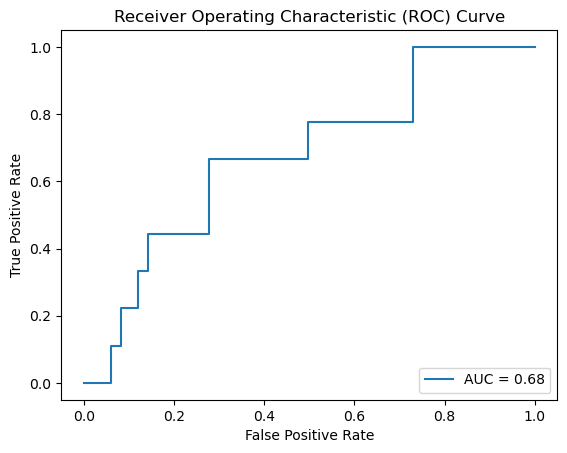

In [126]:
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
y_prob = log_reg.predict_proba(indep1_test)[:, 1]
fpr, tpr,_= roc_curve(dep1_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay (fpr=fpr, tpr=tpr,roc_auc=roc_auc)
roc_display.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [127]:
#Interpretation 
#Since the model is performing very well. We can predict the employees who are more likely to have high absenteeism because the model performance is extremely good. 

In [144]:
from sklearn import neighbors

In [193]:
from sklearn.neighbors import KNeighborsClassifier


In [140]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [191]:
X_knn = df[['Absenteeism time in hours','Transportation expense','Distance from Residence to Work','Disciplinary failure','Hit target']]

In [190]:
Y_knn = df[['Reason for absence']]

In [194]:
X_knn_train, X_knn_test, Y_knn_train, Y_knn_test = train_test_split(X_knn, Y_knn, test_size=0.2, random_state=42)

In [195]:
df.shape

(706, 20)

In [196]:
performance = []
k_options = np.arange(25,560,25)
for which_k in k_options:
    temp_model = neighbors.KNeighborsClassifier(which_k)
    temp_model.fit(X_knn_train, Y_knn_train)
    Y_knn_pred = temp_model.predict(X_knn_test)
    print("if k is", which_k, "performace is", accuracy_score(Y_knn_test,Y_knn_pred)*100)
    performance.append( accuracy_score(Y_knn_test,Y_knn_pred)*100)

if k is 25 performace is 30.28169014084507
if k is 50 performace is 30.985915492957744
if k is 75 performace is 30.28169014084507
if k is 100 performace is 33.80281690140845
if k is 125 performace is 30.28169014084507
if k is 150 performace is 28.169014084507044
if k is 175 performace is 28.169014084507044
if k is 200 performace is 23.943661971830984
if k is 225 performace is 23.943661971830984
if k is 250 performace is 19.718309859154928
if k is 275 performace is 20.422535211267608
if k is 300 performace is 20.422535211267608
if k is 325 performace is 20.422535211267608
if k is 350 performace is 20.422535211267608
if k is 375 performace is 20.422535211267608
if k is 400 performace is 20.422535211267608
if k is 425 performace is 20.422535211267608
if k is 450 performace is 20.422535211267608
if k is 475 performace is 20.422535211267608
if k is 500 performace is 20.422535211267608
if k is 525 performace is 20.422535211267608
if k is 550 performace is 20.422535211267608


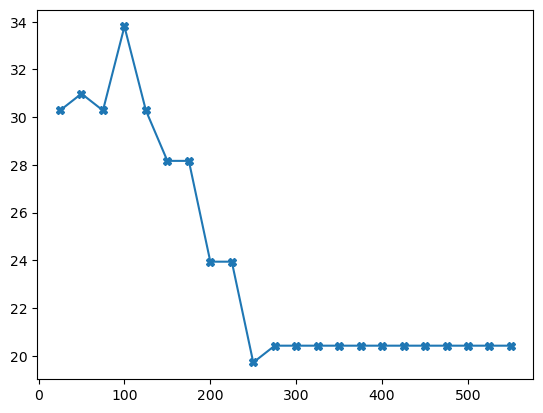

In [172]:
plt.plot(k_options, performance,marker = 'X');

In [197]:
final_model = neighbors.KNeighborsClassifier(100)
final_model.fit(X_knn_train, Y_knn_train)
y_pred = final_model.predict(X_knn_test)
print("if k is 100 then performance is", accuracy_score(Y_knn_test,y_pred)*100)

if k is 100 then performance is 33.80281690140845


In [198]:
final_model.n_neighbors #Value of K

100

In [199]:
#Interpretation
# Since the model performance is very low. We cannot predict employees who are more likely to have high absenteeism because the performance of the model is very poor i.e. 33.80%

In [200]:
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

In [ ]:
#Absent
#Month of absence
#Reason for absence
#Disc

In [202]:
df2.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [201]:
df2 = df.copy()

In [203]:
df2 = df.drop(['ID', 'Day of the week','Seasons', 'Transportation expense', 'Distance from Residence to Work','Age', 'Work load Average/day ', 'Hit target',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index'], axis=1)

In [205]:
df2

,Reason for absence,Month of absence,Disciplinary failure,Absenteeism time in hours
0,25,7,0,0.033333
1,0,7,1,0.000000
2,22,7,0,0.016667
3,7,7,0,0.033333
4,22,7,0,0.016667
...,...,...,...,...
735,14,7,0,0.066667
736,11,7,0,0.033333
737,0,0,0,0.000000
738,0,0,0,0.000000


In [206]:
err=[]
mycluster2 = np.arange(2,20)
for f in mycluster2:
    model = KMeans(n_clusters=f, random_state = 42)
    model.fit(df2)
    sil_avg = silhouette_score(df2, model.labels_)
    print("For n_clusters =", f)
    print("The average silhouette_score is :",sil_avg)

For n_clusters = 2
The average silhouette_score is : 0.5809312574112241
For n_clusters = 3
The average silhouette_score is : 0.5287341728150483
For n_clusters = 4
The average silhouette_score is : 0.4511813285015131
For n_clusters = 5
The average silhouette_score is : 0.44695507326850453
For n_clusters = 6
The average silhouette_score is : 0.44165393954909415
For n_clusters = 7
The average silhouette_score is : 0.46523005868814554
For n_clusters = 8
The average silhouette_score is : 0.4567736591695837
For n_clusters = 9
The average silhouette_score is : 0.47095705872102545
For n_clusters = 10
The average silhouette_score is : 0.4736107413251423
For n_clusters = 11
The average silhouette_score is : 0.46419295929585264
For n_clusters = 12
The average silhouette_score is : 0.45824656539168096
For n_clusters = 13
The average silhouette_score is : 0.45375399177052705
For n_clusters = 14
The average silhouette_score is : 0.45729440057616705
For n_clusters = 15
The average silhouette_score is

In [207]:
for myclust in mycluster2:
    model=KMeans(n_clusters= myclust, random_state=42)
    model.fit(df2)
    sil_avg=silhouette_score(df2, model.labels_)
    

In [208]:
#final value of k is 2

In [209]:
final_km=KMeans(n_clusters=2, random_state=42)
final_km.fit(df2)
final_centroid=final_km.cluster_centers_
print("final centroids are",final_centroid)
final_labels=final_km.labels_
print("final labels are",final_labels)
print("errors are",final_km.inertia_) 
print("for n_cluster=",myclust, "calinski_harabasz_score is:",calinski_harabasz_score(df2, final_km.labels_)) 
print("for n_cluster=",myclust, "davies_bouldin_scoreis:",davies_bouldin_score(df2, final_km.labels_)) 


final centroids are [[2.33050847e+01 6.34957627e+00 1.45716772e-16 4.40501412e-02]
 [8.22222222e+00 6.53418803e+00 1.70940171e-01 9.07407407e-02]]
final labels are [0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 1 

In [218]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                float64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                               int64
Body mass index                      int64
Absenteeism time in hours          float64
dtype: object

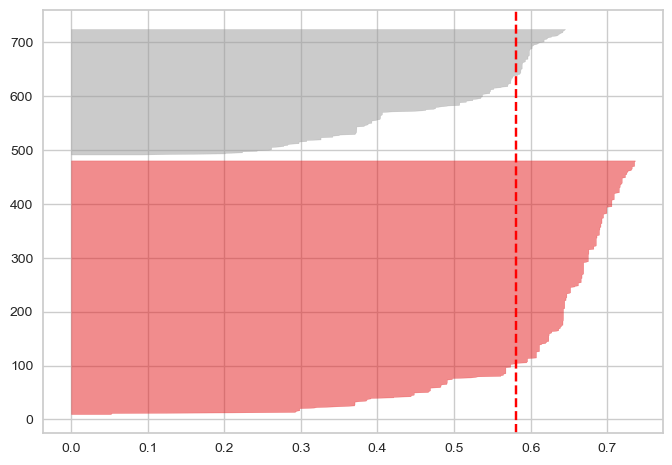

In [211]:
vis=SilhouetteVisualizer(final_km)
vis.fit(df2);

In [212]:
df_1=pd.DataFrame(df2)
df_1

,Reason for absence,Month of absence,Disciplinary failure,Absenteeism time in hours
0,25,7,0,0.033333
1,0,7,1,0.000000
2,22,7,0,0.016667
3,7,7,0,0.033333
4,22,7,0,0.016667
...,...,...,...,...
735,14,7,0,0.066667
736,11,7,0,0.033333
737,0,0,0,0.000000
738,0,0,0,0.000000


In [214]:
df_1["group"]=final_km.labels_
df_1

,Reason for absence,Month of absence,Disciplinary failure,Absenteeism time in hours,group
0,25,7,0,0.033333,0
1,0,7,1,0.000000,1
2,22,7,0,0.016667,0
3,7,7,0,0.033333,1
4,22,7,0,0.016667,0
...,...,...,...,...,...
735,14,7,0,0.066667,1
736,11,7,0,0.033333,1
737,0,0,0,0.000000,1
738,0,0,0,0.000000,1


In [215]:
final_km.cluster_centers_

array([[2.33050847e+01, 6.34957627e+00, 1.45716772e-16, 4.40501412e-02],
       [8.22222222e+00, 6.53418803e+00, 1.70940171e-01, 9.07407407e-02]])

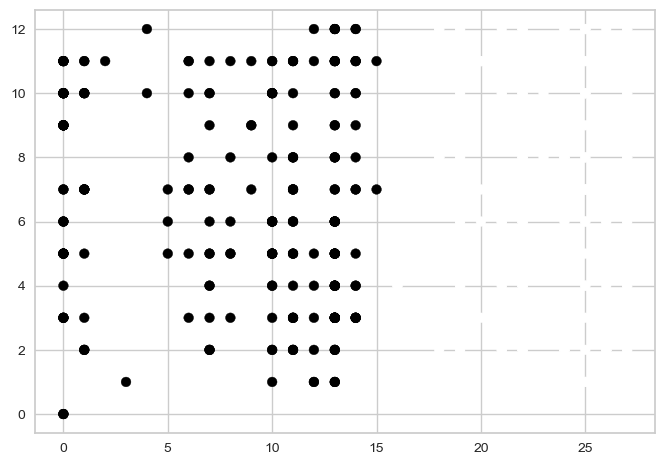

In [217]:
plt.scatter( df_1['Reason for absence'], df_1['Month of absence'],c = final_km.labels_)